In [1]:
import os
import rasterio as rio
from rasterio import windows
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm



(array([2, 3, 5, 6], dtype=uint8), array([75235, 28629, 36574, 19562]))


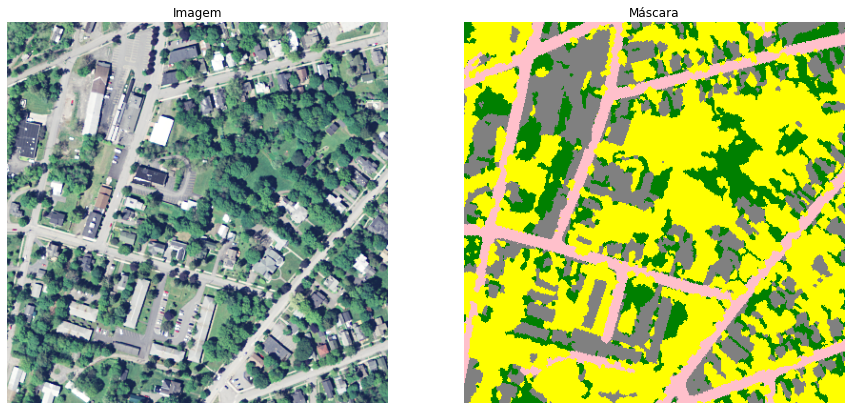

In [7]:
# with rio.open("/scratch/dataset/chesapeake/ny_1m_2013_extended-debuffered-train_tiles/m_4207531_sw_18_1_naip-new.tif") as src:
#     print(src.width, src.height)
#     print(src.crs)
#     print(src.transform)
#     print(src.count)
#     print(src.indexes)

#     red = src.read(1)  # Primeira banda
#     green = src.read(2)  # Segunda banda
#     blue = src.read(3)  # Terceira banda

# # Empilhar as bandas em um array (altura, largura, canais)
# rgb = np.dstack((red, green, blue))

# # Plotar a imagem RGB
# plt.figure(figsize=(10, 10))
# plt.imshow(rgb)
# plt.axis('off')  # Esconder os eixos
# plt.show()

# Função para ler e empilhar bandas RGB
def read_rgb_image(filepath):
    with rio.open(filepath) as src:
        red = src.read(1)
        green = src.read(2)
        blue = src.read(3)
        rgb = np.dstack((red, green, blue))
    return rgb


colors = [
    'whie',    # 0 - não existe
    'cyan',    # 1 - agua
    'yellow',  # 2 - floresta
    'green',   # 3 - campo
    'black',   # 4 - terra estéril
    'grey',    # 5 - impermeável (outro)
    'pink',    # 6 - impermeável (estrada)
    'black'    # 15 - sem dados
    # Adicione mais cores se tiver mais valores
]

mask_palette = {
    0: (0, 0, 0),  # não existe no dataset
    1: (0, 255, 255),    # agua
    2: (255, 255, 0),    # floresta
    3: (0, 128, 0),      # campo
    4: (142,35,107),        # terra estéril
    5: (128, 128, 128),  # impermeável (outro)
    6: (255, 192, 203),  # impermeável (estrada)
    15: (0, 0, 0)        # sem dados
}

# Cria um dicionário para mapear índices para cores RGB
index_to_color = {index: color for index, color in mask_palette.items()}

def convert_mask(np_mask):
    height, width, channels = np_mask.shape

    # Assume que o primeiro canal é o índice da classe
    class_channel = np_mask[:, :, 0]
    new_mask = np.zeros((height, width, 3), dtype=np.uint8)
    
    # Mapeia os valores do primeiro canal para cores
    for index, color in index_to_color.items():
        new_mask[class_channel == index] = color
    
    return new_mask

# Crie o colormap e o norm
cmap = ListedColormap(colors)
bounds = list(range(len(colors)))  # Se você tiver valores de 0 a 6, ajuste conforme necessário
norm = BoundaryNorm(bounds, cmap.N, clip=True)
img_path = ""
mask_path = ""
# Ler as duas imagens
rgb_image = read_rgb_image("/scratch/matheuspimenta/chesapeake_400/images/m_4207417_ne_0_5200.tif")
mask_image = rio.open("/scratch/matheuspimenta/chesapeake_400/masks/m_4207417_ne_0_5200.tif").read()
print(np.unique(mask_image, return_counts=True))
mask_image = convert_mask(np.moveaxis(mask_image, 0, -1))
# Criar a figura e subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 15))

# Exibir a primeira imagem
ax1.imshow(rgb_image)
ax1.set_title('Imagem')
ax1.axis('off')

ax2.imshow(mask_image, cmap=cmap, norm=norm)
ax2.set_title('Máscara')
ax2.axis('off')

# Mostrar a figura com as duas imagens lado a lado
plt.show()